<a href="https://colab.research.google.com/github/lauracline/Technical-Specs-of-Automobiles/blob/master/Linear_Model_Selection_and_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter Six: Linear Model Selection and Regularization** 

Linear models still do astonishinlgy well compared to non-linear modles. This chapter will explore other types of fitting besides least squares because they can given better prediction accuracy and interpretability. 

## **Classes of Alternatives to Least Squares**

1. Subset Selection: Choose of a subset of the predictors
2. Shrinkage (Regularization): Fit all predictors but limit their size. Coefficients can go to 0. 
3. Dimension Reduction: project the predictors into a smaller subspace. 

## **Best Subset Selection**

Fit all the possible models $2^{p}$ and take the one with the highest adjusted $R^{2}$ through cross validation. This can be impossible with a large enough p. 

## **Stepwise Selection - Forward, Backward and Both**

Because of computational limitation a simpler method of adding or subtracting the best predictor to the current model is employed. 

### **Forward Selection**

Start with an empty model and choose a predictor to add to the model based on the best adjusted $R^{2}$ or other similiar metric. Continue adding variables until no improvement in adjusted $R^{2}$. 

A variation of this is to retain each model at each step and use $R^{2}$ (not adjusted) as the metric. This will build p models. Then use cross validation witth $R^{2}$ to pick the best model of those p models built from forward selection. 

### **Backward Selection**

Similiar to forward selection but start with all predictors in the model and remove one at a time until adjusted $R^{2}$ is maximized or alternatively, find p models with $R^{2}$ and then use cross validation to pick the best of the p models. 

### **Both**

At each step, consider both adding or subtracting a variable in the model. 

## **Choosing Optimal Model**

### **Adjusting Training Statistics or Using Cross Validation** 

As learned in Chapter 5, cross validation is an extremely good tool at giving us insight to how well the model will be used on unseen data (test data). 

But alternatively to cross validation, we can punish the training error statistics so in theory they can give us insight on what the test error will be. There have been several statistics developed to give us insight as to what the model will do for unseen errors. 

The four most popular are AIC, BIC, Mallows Cp, and Adjusted $R^{2}$. AIC, BIC and Cp all have similiar formulas that inflate the error for more predictors and a higher estimated varaince. Adjusted $R^{2}$ lowers the $R^{2}$ by each additional predictor in the model. All four of these statistics are 'classical' model selectors and were used before cross validation and so relied on just fitting the data one time on ALL the data. 

Cross validation can be computationally intense but with modern computation we can build lots of models and evaluate them easily. 

### **Shrinkage Methods**

Ridge and Lasso regression are the most common. 

#### **Ridge Regression**

Minmimizes not only the squared error (RSS) but sum of predictors squared times a constant $\lambda$. When $\lambda$ is 0 then ridge equals least squares, when $\lambda$ heads to infinity, all predictors head to 0. 

Since ridge regression works directly with the size of the parameter coefficients, you must scale all the predictors by dividing by their standard deviation. 

#### **The Lasso**

Uses L1 penalty instead of L2 (absolute value of predictors vs. squared value). The lasso performs variable selection by setting some predictors exacly 0 (and thus automatic variable selection), unlike ridge which will never completely eliminate variables. 

#### **Alternative Logic of Lasso and Ridge Regression**

Instead of thinking of penalizing the error by either the L1 or L2 norm, we can think of setting up lasso/ridge regression as minimizing the squared errors subject to keeping the parameters less than a certain value. Think of this value as a 'budget' of allowable spending to occur. You can allow yourself to spend your parameters in any way you chose as long as you don't go over the total budget. 

Lasso yields predictors equivalent to 0 because of sharp corners. 

#### **What is Better, Lasso or Ridge?**

No way to tell beforehand in general, in settings where they are many important predictor variables that related to the response, ridge regression will perform better. When there are only a few variables related to the response, then lasso will do better. 

But...as always cross validation can be used. 

#### **Choosing Lambda**

Choos $\lambda$ through cross validation. Search an array of $\lambda$'s through cross validation and choose the $\lambda$ which minimizes MSE. Then build your model with that $\lambda$ on all the data.

## **Dimension Reduction Techniques**

Instead of using the origianl predictors, we transform then first and then fit our models. Usually we transform variables so that there are less in number than the original set. Two approaches are recommended - principal components and partial least squares. 

### **Principal Component Analysis (PCA)**

The first principal component is the direction where observations vary the most. We want to capture as much information as we can in one single direction. Which single direction captures as much information as possible? The direction where the variance is highest amongest the projected points. 

The first principal components also minimizes the sum of squared perpendicular distances between point and line. Each transformed first principal component can be thought as single number summaries of all that particular observation.

The second principal component must be uncorrelated to the first which makes it orthogonal (90 degrees in two dimensions) to the first. The second principal component will capture less information (less spread). Plotting each principal component against each variable can show how much information is captured by each one. 

#### **Principal Component Regression**

First find the first M principal components where M < p then fit with least squares. Choose M with cross validation. Usually, data is standardized by standard deviation first. 

#### **Partial Least Squares**

The response does not determine the principal components. This means PCA is used in an unsupervised way. PLS is a supervised alternative to PCR. PLS generates new features as a linear combination of the old features and the response. 

Computed by doing simple linear regression of Y onto each predictor and setting that coefficient to the linear combination coefficient for transformed variable Z1. So weights are higher for those variables with stronger relationships to response. Z2 is computed by regressing all variables against the residuals of Z1 being fit to the model. Do this iteratively (fit remaining residuals) to come up with M PLS components. Then do least squares fit on all M new dimensions. In practice, PLS does not do better than PCR or ridge regression. 

## **High Dimensional Data**

When speaking of high dimensional data, we generally mean data with many predictors, especially when p approaches or exceeds n. Generally it is better to have more predictors but if many of the predictors are not associated with the response then they can cause the actual signal to get diluted - a double edged sword these predictors. 

## **Excercises**

### **Question Eight**

In this excercise, we will generate simulated data, and will then use this data to perform best subset selection. 

A. Use the random function to generate a predictor X of length n = 100 as well as a noise vector $\epsilon$ of length n = 100. 

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import matplotlib as plt
%matplotlib inline 

In [2]:
x = np.random.randn(100)
err = np.random.randn(100)

B. Generate a response vector y of length n = 100 according to the model $Y = \beta_{0} + \beta_{1}X + \beta_{2}X^{2} + \beta_{3}X^{3} + \epsilon$, where $\beta_{0}$, $\beta_{1}$, $\beta_{2}$, and $\beta_{3}$ are constants of your choice. 

In [3]:
beta0, beta1, beta2, beta3 = -5, 1, 4, 3
y = beta0 + beta1 * x + beta2 * x ** 2 + beta3 * x ** 3 + err

C. Perform best subset selection in order to choose the best model containing the predictors $X$, $X^{2}$,...,$X^{10}$. What is the best model obtained according to $C_{p}$, BIC, and adjusted $R^{2}$? Show some plots to provide evidence for your answer and report the coefficients of the best model obtained. You will also need to create a single dataset containing both X and y. 

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from itertools import combinations
from collections import OrderedDict

In [5]:
OrderedDict({'b': 1, 'a':534})

OrderedDict([('b', 1), ('a', 534)])

In [6]:
df = pd.DataFrame({'x1': x, 'x2': x ** 2, 'x3': x**3, 'x4': x**4,'x5': x**5,
                   'x6': x**6,'x7': x**7,'x8': x**8,'x9': x**9,'x9_10': x**10,
                   'y':y})

In [33]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x9_10,y
0,-0.136000,0.018496,-0.002515,0.000342,-0.000047,0.000006,-8.605272e-07,1.170314e-07,-1.591623e-08,2.164602e-09,-6.497316
1,-0.246996,0.061007,-0.015068,0.003722,-0.000919,0.000227,-5.608246e-05,1.385213e-05,-3.421419e-06,8.450761e-07,-3.023842
2,-0.220629,0.048677,-0.010740,0.002369,-0.000523,0.000115,-2.544725e-05,5.614406e-06,-1.238702e-06,2.732938e-07,-6.139051
3,0.816383,0.666480,0.544103,0.444196,0.362634,0.296048,2.416884e-01,1.973102e-01,1.610806e-01,1.315034e-01,0.477312
4,-0.530012,0.280913,-0.148887,0.078912,-0.041824,0.022167,-1.174899e-02,6.227108e-03,-3.300442e-03,1.749274e-03,-5.609277


In [7]:
lr = LinearRegression()

In [8]:
X = df.iloc[:, :-1]
y = df['y']

In [9]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
sigma2 = np.sum((lr.predict(X) - y) ** 2) / len(X)

In [11]:
# Best subset selection 
n = len(X)
idx = pd.IndexSlice
cp = []
bic = []
adj_r2 = []
for i in range(1, 11):
    current_cp = []
    current_bic = []
    current_adj_r2 = []
    for comb in combinations(range(10), i):
        X = df.iloc[:,comb]
        lr.fit(X, y)
        rss = np.sum((lr.predict(X) - y) ** 2)
        tss = np.sum((y - y.mean()) ** 2)
        d = len(comb)
        current_cp.append(1/n * (rss + 2 * d * sigma2))
        current_bic.append(1/n * (rss + np.log(n) * d * sigma2))
        current_adj_r2.append(1 - rss / (n - d - 1) * (n - 1) / tss)
        
    cp.append(min(current_cp))
    bic.append(min(current_bic))
    adj_r2.append(max(current_adj_r2))

IndexingError: ignored

In [12]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 11), cp)
plt.plot(range(1, 11), bic)
plt.title("CP and BIC Best subset")

TypeError: ignored

In [13]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), adj_r2)
plt.title("Adjusted R^2")

TypeError: ignored

In [14]:
# all three agree on the correct model
np.argmin(cp), np.argmin(bic), np.argmin(adj_r2)

ValueError: ignored

D. Repeat (C), using forward stepwise selection and also using backwards stepwise selection. How does your answer compare to the results in (C)?

In [15]:
# Forward selection. Looks at Cp each step and stops 
# if it can't beat old best
current_vars = []
best_cp = 10000000
prev_cp = best_cp
best_cp = 1000000
while best_cp < prev_cp:
    prev_cp = best_cp
    old_vars = current_vars.copy()
    for i in range(10):
        if i in current_vars:
            continue
        X = df.iloc[:, old_vars + [i]]
        lr.fit(X, y)
        rss = np.sum((lr.predict(X) - y) ** 2)
        d = len(old_vars) + 1
        cur_cp = 1/n * (rss + 2 * d * sigma2)
        if cur_cp < best_cp:
            current_vars = old_vars + [i]
            best_cp = cur_cp

In [16]:
current_vars

[2, 1, 0]

In [17]:
best_cp

0.739982541615513

In [18]:
old_vars

[2, 1, 0]

In [19]:
# Backward stepwise selection. Looks at Cp each steps and stops if it
# can't beat the old best

current_vars = list(range(10))
best_cp = 10000000
prev_cp = best_cp
best_cp = 1000000
while best_cp < prev_cp:
    prev_cp = best_cp
    old_vars = current_vars.copy()
    for i in range(10):
        if i not in current_vars:
            continue
        old_vars2 = old_vars.copy()
        old_vars2.remove(i)
        X = df.iloc[:, old_vars2]
        lr.fit(X, y)
        rss = np.sum((lr.predict(X) - y) ** 2)
        d = len(old_vars) + 1
        cur_cp = 1/n * (rss + 2 * d * sigma2)
        if cur_cp < best_cp:
            current_vars = old_vars2.copy()
            best_cp = cur_cp

In [22]:
current_vars # Different answer for backward selection 

[0, 1, 2, 5, 7, 9]

E. Now fit a lasso model to the simulated data, again using $X$, $X^{2}$,...,$X^{10}$ as predictors. Use cross-validation to select the optimal value of $\lambda$. Create plots of the cross-validation error as a function of $\lambda$. Report the resulting coefficient estimates, and discuss the results obtained. 

In [23]:
X = df.iloc[:, :-1]

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

In [26]:
X_stand = X / X.std()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_stand, y)

In [35]:
import matplotlib.pyplot as plt 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8807491597892678, tolerance: 0.582480488586456
  positive)


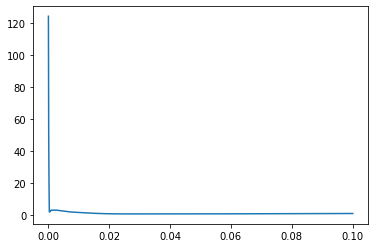

In [36]:
alphas = np.linspace(.0001, .1, 1000)
errors = []
for alpha in alphas:
    ls = Lasso(alpha, max_iter=100000, tol=.0001)
    ls.fit(X_train, y_train)
    errors.append(np.mean((ls.predict(X_test) - y_test) ** 2))

plt.plot(alphas, errors)
plt.show()

In [37]:
np.argmin(errors)

284

In [38]:
alphas[53]

0.0054

In [39]:
ls = Lasso(alpha = 0.0054, max_iter=100000, tol = 0.0001)
ls.fit(X_stand, y)

Lasso(alpha=0.0054, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [40]:
ls.intercept_, ls.coef_

(-4.897010252204153,
 array([ 1.09930815,  5.32858719, 10.79046387,  0.93354062, -0.        ,
        -0.        , -0.        , -0.        , -0.02250285, -0.44600536]))

In [41]:
# beta 3 was very far off
beta0, beta1, beta2, beta3

(-5, 1, 4, 3)

F. Now generate a response vector $Y$ according to the model 

$Y = \beta_{0} + \beta_{7}X^{7} + \epsilon$,

and perform best subset selection and the lasso. Discuss the results obtained. 

In [42]:
beta0_7 = 3
beta7 = -1

In [43]:
y_7 = beta0_7 + beta7 * x ** 7 + err

In [45]:
df_7 = pd.DataFrame({'x1': x, 'x2': x ** 2, 'x3': x**3, 'x4': x**4,'x5': x**5,
                   'x6': x**6,'x7': x**7,'x8': x**8,'x9': x**9,'x9_10': x**10,
                   'y':y_7})

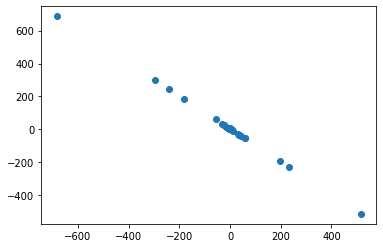

In [46]:
plt.scatter(X['x7'], y_7)

In [47]:
# Best subset selection 


# best subset selection
X = df_7.iloc[:, :-1]
n = len(X)
tss = np.sum((y_7 - y_7.mean()) ** 2)
lr.fit(X,  y_7)
sigma2 = np.sum((lr.predict(X) - y_7) ** 2) / len(X)
cp = []
bic = []
adj_r2 = []
for i in range(1, 11):
    current_cp = []
    current_bic = []
    current_adj_r2 = []
    for comb in combinations(range(10), i):
        X = df_7.iloc[:, comb]
        lr.fit(X, y_7)
        rss = np.sum((lr.predict(X) - y_7) ** 2)
        
        d = len(comb)
        current_cp.append(1/n * (rss + 2 * d * sigma2))
        current_bic.append(1/n * (rss + np.log(n) * d * sigma2))
        current_adj_r2.append(1 - rss / (n - d - 1) * (n - 1) / tss)
        
    cp.append(min(current_cp))
    bic.append(min(current_bic))
    adj_r2.append(max(current_adj_r2))

IndexingError: ignored

ValueError: ignored

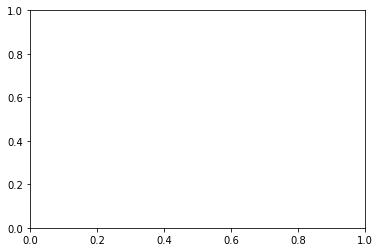

In [48]:
# Best model is with one predictor
plt.plot(range(10), cp)
bic.append(min(current_bic))

In [49]:
# Lasso
X = df_7.iloc[:, :-1]
X_stand = X / X.std()
X_train, X_test, y_train, y_test = train_test_split(X_stand, y_7)

In [50]:
alphas = np.linspace(0.001, 50, 100)
errors =[]
la = Lasso(alpha, max_iter=1000000000, tol = 0.000001)

for alpha in alphas:
  ls = Lasso(alpha=alpha)
  ls.fit(X_train, y_train)
  errors.append(np.mean((ls.predict(X_test) - y_test)**2))

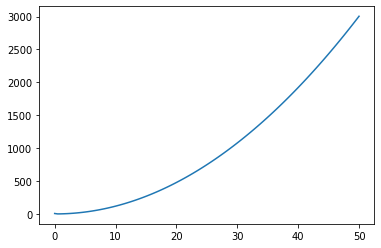

In [51]:
plt.plot(alphas, errors)

In [52]:
best_alpha = alphas[np.argmin(errors)]
best_alpha

0.5060404040404041

In [53]:
ls = Lasso(alpha=best_alpha, max_iter=100000, tol = 0.000001)
ls.fit(X_stand, y_7)

Lasso(alpha=0.5060404040404041, copy_X=True, fit_intercept=True,
      max_iter=100000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=1e-06, warm_start=False)

In [54]:
# Coefficient doesn't resemble model at all. But these have been
#scaled by their std. must divide by std
ls.coef_

array([  -0.        ,    0.        ,   -0.        ,    0.        ,
         -0.        ,    0.        , -101.19532436,    0.        ,
         -0.        ,    0.        ])

In [55]:
# That's better - very close to actual value of -1
ls.coef_ / x.std()

array([ -0.        ,   0.        ,  -0.        ,   0.        ,
        -0.        ,   0.        , -98.08854626,   0.        ,
        -0.        ,   0.        ])

In [56]:
# Also look at the intercept
ls.intercept_

3.1214870709935276

### **Question Nine**

In this excercise, we will predict the number of college applications received using the other variables in the `College` dataset.

A. Split the dataset into a training set and a test set.

In [57]:
college = pd.read_csv('https://raw.githubusercontent.com/emredjan/ISL-python/master/datasets/College.csv')

In [58]:
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [59]:
college['Private'].value_counts()

Yes    565
No     212
Name: Private, dtype: int64

In [60]:
college['private_yes'] = (college['Private'] == 'Yes') *1

In [61]:
X = college.iloc[:, 3:]

In [62]:
y = college['Apps']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

B. Fit a linear model using least squares on the training set and report the test error obtained. 

In [64]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
# Error
np.mean((lr.predict(X_test) - y_test)**2)

966943.0372505634

C. Fit a ridge regression model on the training set, with $\lambda$ chosen by cross-validattion. Report the test error obtained. 

In [66]:
from sklearn.linear_model import RidgeCV

In [69]:
X_std = X.iloc[:, :-1].std()

In [70]:
X_std['private_yes'] = 1

In [71]:
X_std

Accept         2451.113971
Enroll          929.176190
Top10perc        17.640364
Top25perc        19.804778
F.Undergrad    4850.420531
P.Undergrad    1522.431887
Outstate       4023.016484
Room.Board     1096.696416
Books           165.105360
Personal        677.071454
PhD              16.328155
Terminal         14.722359
S.F.Ratio         3.958349
perc.alumni      12.391801
Expend         5221.768440
Grad.Rate        17.177710
private_yes       1.000000
dtype: float64

In [ ]:
rcv = RidgeCV(alphas = np.linspace(0.01, 100, 1000), cv=10)
rcv.fit(X / X_std, y)